<a href="https://colab.research.google.com/github/860151558059/UsedCarPricePred/blob/main/CAII_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DataSet/CAIIML.csv")
df.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1],df.iloc[:, -1], test_size = 0.3, random_state = 32)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 5375 to 2775
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4213 non-null   int64  
 1   Name               4213 non-null   object 
 2   Location           4213 non-null   object 
 3   Year               4213 non-null   int64  
 4   Kilometers_Driven  4213 non-null   int64  
 5   Fuel_Type          4213 non-null   object 
 6   Transmission       4213 non-null   object 
 7   Owner_Type         4213 non-null   object 
 8   Mileage            4212 non-null   object 
 9   Engine             4191 non-null   object 
 10  Power              4191 non-null   object 
 11  Seats              4191 non-null   float64
 12  New_Price          577 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 460.8+ KB


In [5]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [6]:
X_train["Name"].value_counts()

,count
Name,
Maruti Swift VDI,31
Mahindra XUV500 W8 2WD,31
Honda City 1.5 S MT,24
Maruti Swift VDI BSIV,23
Maruti Swift Dzire VDI,23
...,...
Hyundai Xcent 1.2 Kappa SX Option,1
Maruti Swift LXI,1
Maruti Swift Dzire VDI Optional,1


In [7]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [8]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

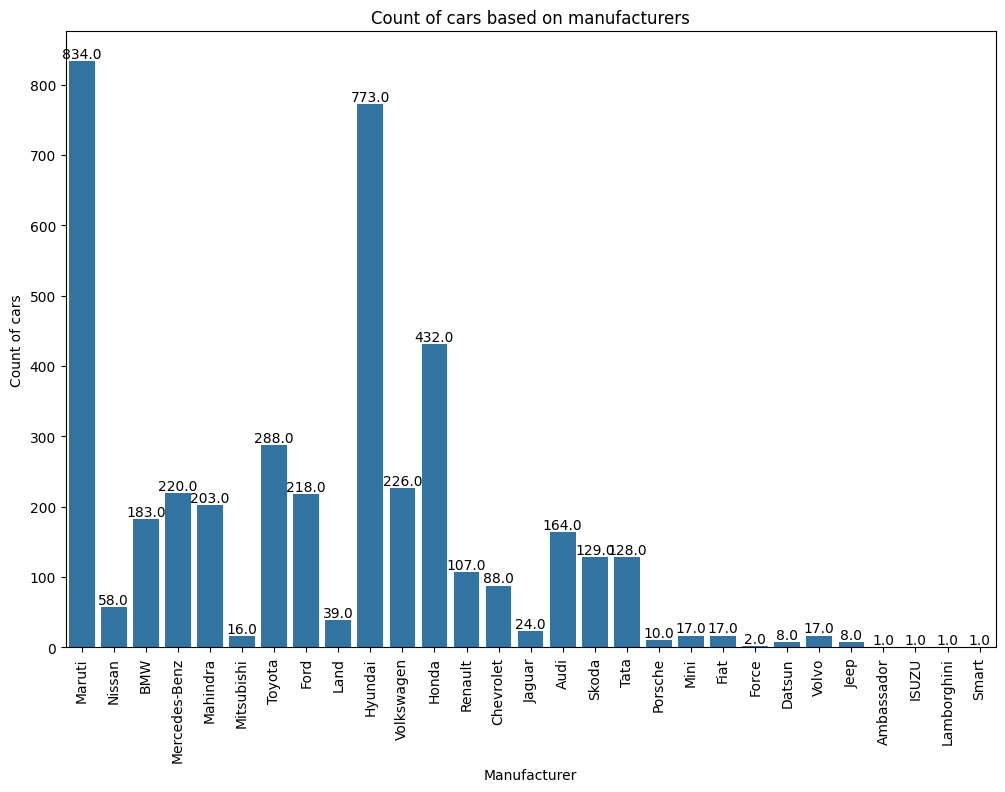

In [9]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [10]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

In [11]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

In [12]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

In [13]:
X_train["Kilometers_Driven"]

,Kilometers_Driven
5375,39437
486,60000
227,47000
3255,17000
1227,49000
...,...
4030,55000
2940,29000
1334,55000
1579,50000


In [14]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

In [15]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

1
1


In [16]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

In [17]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [18]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

In [19]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

In [20]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [21]:
X_train = pd.get_dummies(X_train, columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"], drop_first = True)

In [22]:
X_test = pd.get_dummies(X_test, columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"], drop_first = True)

In [23]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [24]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [25]:
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.9264371130601772

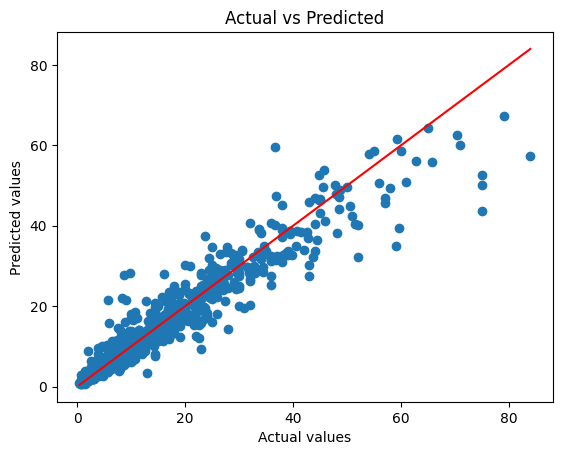

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 8.88806324295757
R2 Score: 0.9264371130601772


In [28]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.7764606370722972

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 27.00861912362369
R2 Score: 0.7764606370722972


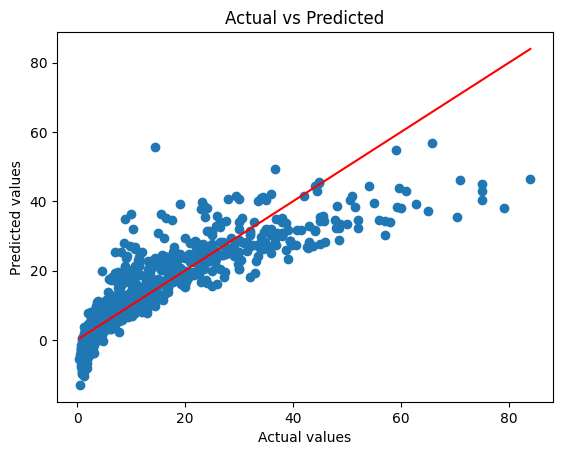

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [31]:
dataset_path = "/content/drive/MyDrive/DataSet/CAIIML.csv"
class CarPricePredictor:
    def __init__(self, dataset_path):
        self.dataset = pd.read_csv(dataset_path)
        self.model = RandomForestRegressor()
        self._prepare_data()
        self._train_model()

    def _preprocess(self, df):
        df = df.copy()

        if df.columns[0] not in ['Name', 'Year', 'Kilometers_Driven']:
            df = df.iloc[:, 1:]

        if "Name" in df.columns:
            make = df["Name"].str.split(" ", expand=True)
            df["Manufacturer"] = make[0]

        for col in ["Name", "Location"]:
            if col in df.columns:
                df.drop(col, axis=1, inplace=True)

        curr_year = datetime.datetime.now().year
        if 'Year' in df.columns:
            df['Year'] = df['Year'].apply(lambda x: curr_year - x)

        if 'Mileage' in df.columns:
            df["Mileage"] = df["Mileage"].str.replace(" kmpl", "").str.replace(" km/kg", "").astype(float)

        if 'Engine' in df.columns:
            df["Engine"] = df["Engine"].str.replace(" CC", "").astype(float)

        if 'Power' in df.columns:
            df["Power"] = df["Power"].str.replace(" bhp", "").replace("null", np.nan).astype(float)

        df = pd.get_dummies(df)

        return df

    def _prepare_data(self):
        X = self.dataset.iloc[:, :-1]
        y = self.dataset.iloc[:, -1]
        X = self._preprocess(X)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=32)

    def _train_model(self):
        self.model.fit(self.X_train, self.y_train)

    def predict(self, input_dict):
        input_df = pd.DataFrame([input_dict])
        input_df = self._preprocess(input_df)

        input_df = input_df.reindex(columns=self.X_train.columns, fill_value=0)
        return self.model.predict(input_df)[0]

    def evaluate(self):
        predictions = self.model.predict(self.X_test)
        return r2_score(self.y_test, predictions)

predictor = CarPricePredictor(dataset_path)
input_data = {
    "Name": "Maruti Wagon R LXI CNG", "Year": 2010, "Kilometers_Driven": 72000,
    "Fuel_Type": "CNG", "Transmission": "Manual", "Owner_Type": "First",
    "Mileage": "26.6 kmpl", "Engine": "998 CC", "Power": "58.16 bhp",
    "Seats": 5
}
predicted_price = predictor.predict(input_data)
print(f"Predicted Price: {predicted_price} Lakhs")


Predicted Price: 1.9006 Lakhs


In [32]:
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd

display(HTML("""
<style>
  .form-title {
    font-size: 28px;
    font-weight: 700;
    text-align: center;
    color: #005959;
    margin-bottom: 25px;
  }
</style>
"""))

input_layout = widgets.Layout(width='400px', height='40px')
label_layout = widgets.Layout(width='150px')
button_layout = widgets.Layout(width='180px', height='45px')

fields = {}
labels = {}

def create_input(name, widget):
    label_html = widgets.HTML(value=f"<span style='font-weight:700; font-size:16px; color:#008b8b'>{name}</span>", layout=label_layout)
    widget.layout = input_layout
    labels[name] = label_html
    fields[name] = widget

    def validate(change):
        val = widget.value
        empty = (val is None) or (val == '') or (isinstance(val, str) and val.strip() == '')
        color = 'red' if empty else '#008b8b'
        label_html.value = f"<span style='font-weight:700; font-size:16px; color:{color}'>{name}</span>"
    widget.observe(validate, names='value')
    validate(None)
    return widgets.HBox([label_html, widget], layout=widgets.Layout(margin='6px 0'))

input_rows = []

input_rows.append(create_input('Name', widgets.Text(placeholder='e.g. Maruti Swift VDI')))
input_rows.append(create_input('Year', widgets.IntText(placeholder='e.g. 2014')))
input_rows.append(create_input('Kilometers_Driven', widgets.IntText()))

input_rows.append(create_input('Mileage (kmpl)', widgets.FloatText(placeholder='e.g. 23.4')))
input_rows.append(create_input('Engine (CC)', widgets.IntText(placeholder='e.g. 1248')))
input_rows.append(create_input('Power (bhp)', widgets.FloatText(placeholder='e.g. 74')))

input_rows.append(create_input('Seats', widgets.IntText()))

input_rows.append(create_input('Fuel_Type', widgets.Dropdown(
    options=['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'],
    value=None,
    placeholder='Select Fuel Type'
)))
input_rows.append(create_input('Transmission', widgets.Dropdown(
    options=['Manual', 'Automatic'],
    value=None,
    placeholder='Select Transmission'
)))
input_rows.append(create_input('Owner_Type', widgets.Dropdown(
    options=['First', 'Second', 'Third', 'Fourth & Above'],
    value=None,
    placeholder='Select Owner Type'
)))

predict_button = widgets.Button(
    description='Predict',
    button_style='info',
    layout=button_layout
)

prediction_output = widgets.Text(
    description='Prediction',
    layout=widgets.Layout(width='400px', height='40px'),
    disabled=True,
    style={'description_width': '120px'}
)

def on_predict_clicked(b):
    input_data = {k: v.value for k, v in fields.items()}
    missing = [k for k, v in input_data.items() if v in (None, '') or (isinstance(v, str) and str(v).strip() == '')]
    if missing:
        prediction_output.value = f"Please fill: {', '.join(missing)}"
        return

    input_data['Mileage'] = f"{input_data['Mileage (kmpl)']} kmpl"
    input_data['Engine'] = f"{input_data['Engine (CC)']} CC"
    input_data['Power'] = f"{input_data['Power (bhp)']} bhp"


    try:
        prediction = predictor.predict(input_data)
        prediction_output.value = f"Predicted Price: ₹ {prediction:,.2f} Lakhs"
    except Exception as e:
        prediction_output.value = f"Error: {str(e)}"

predict_button.on_click(on_predict_clicked)


form_card = widgets.VBox(input_rows + [widgets.HBox([predict_button, prediction_output])])
centered_box = widgets.Box([form_card], layout=widgets.Layout(display='flex', justify_content='center'))

display(HTML("<div class='form-title'>Car Price Prediction Input Form</div>"))
display(centered_box)


Box(children=(VBox(children=(HBox(children=(HTML(value="<span style='font-weight:700; font-size:16px; color:re…

In [33]:
# #Example :
# BMW
# 2014
# 40000
# 22.69
# 1995
# 190
# 5
# Diesel
# Automatic
# First